In [11]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#import helper

import matplotlib.pyplot as plt
from torchvision import datasets , transforms

In [3]:
#Loading and pre-processing the dataset 

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw





Extracting C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Asus/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...
Done!


In [7]:
train_iter =iter(trainloader)
images, labels = next(train_iter)
print(images.shape,labels.shape)
print(labels[:])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor([3, 7, 6, 2, 3, 2, 6, 0, 4, 4, 4, 2, 9, 1, 8, 7, 1, 1, 5, 7, 9, 9, 7, 4,
        3, 7, 4, 9, 7, 6, 2, 3, 7, 2, 2, 3, 0, 7, 9, 7, 1, 0, 3, 8, 3, 5, 1, 3,
        7, 7, 2, 0, 6, 7, 6, 0, 0, 2, 3, 9, 2, 6, 3, 3])


In [15]:
#Model Definition
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # defining first hidden layer with output 1024
        self.linear1 = nn.Linear(784,1024)
        self.linear2 = nn.Linear(1024,512)
        self.linear3 = nn.Linear(512,256)
        self.linear4 = nn.Linear(256,128)
        self.linear5 = nn.Linear(128,10)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = self.linear5(x)
        return x
model= Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [18]:
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

1494154


In [17]:
# Epoch definition
Epochs=15
for i in range(Epochs):
    running_loss=0
    for images,labels in trainloader:
        images =images.to(device)
        labels =labels.to(device)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        running_loss += loss
        optimizer.step()
    print("Average loss in Epoch:",i+1,running_loss/len(trainloader))

Average loss in Epoch: 1 tensor(0.4214, grad_fn=<DivBackward0>)
Average loss in Epoch: 2 tensor(0.3980, grad_fn=<DivBackward0>)
Average loss in Epoch: 3 tensor(0.3791, grad_fn=<DivBackward0>)
Average loss in Epoch: 4 tensor(0.3635, grad_fn=<DivBackward0>)
Average loss in Epoch: 5 tensor(0.3474, grad_fn=<DivBackward0>)
Average loss in Epoch: 6 tensor(0.3359, grad_fn=<DivBackward0>)
Average loss in Epoch: 7 tensor(0.3236, grad_fn=<DivBackward0>)
Average loss in Epoch: 8 tensor(0.3141, grad_fn=<DivBackward0>)
Average loss in Epoch: 9 tensor(0.3035, grad_fn=<DivBackward0>)
Average loss in Epoch: 10 tensor(0.2944, grad_fn=<DivBackward0>)
Average loss in Epoch: 11 tensor(0.2874, grad_fn=<DivBackward0>)
Average loss in Epoch: 12 tensor(0.2786, grad_fn=<DivBackward0>)
Average loss in Epoch: 13 tensor(0.2715, grad_fn=<DivBackward0>)
Average loss in Epoch: 14 tensor(0.2649, grad_fn=<DivBackward0>)
Average loss in Epoch: 15 tensor(0.2565, grad_fn=<DivBackward0>)


In [19]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

tensor(9) tensor(9)


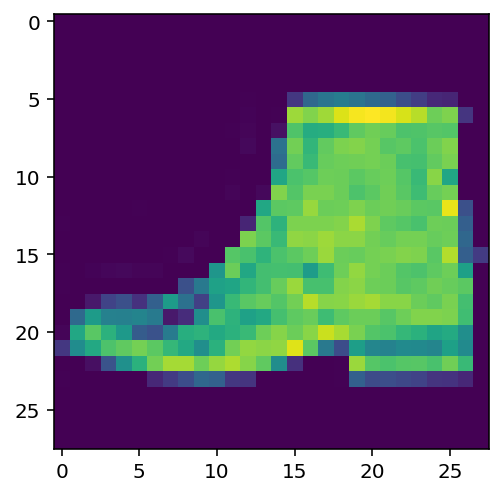

In [27]:
test_iter = iter(testloader)
imgs,target = test_iter.next()
img = imgs[5]
img = img.resize_(1,784)
with torch.no_grad():
    score = model(img)
score=softmax(score)
plt.imshow(img.reshape(28,28))
print(torch.argmax(score),target[5])